In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
import geopandas as gpd
#from mpl_toolkits.basemap import Basemap

In [3]:
airports_1 = gpd.read_file('Data Sources/Global Airports Shapefile (1)/ne_10m_airports.shp')
airports_2 = gpd.read_file('Data Sources/Global Airports Shapefile 2 (1)/wld_trs_airports_wfp.shp')
ports_1 = gpd.read_file('Data Sources/Global Ports Shapefile (1)/WPI.shp')
ports_2= gpd.read_file('Data Sources/Global Ports Shapefile 2 (1)/ne_50m_ports.shp')

### Let's have a look at the first shapefile

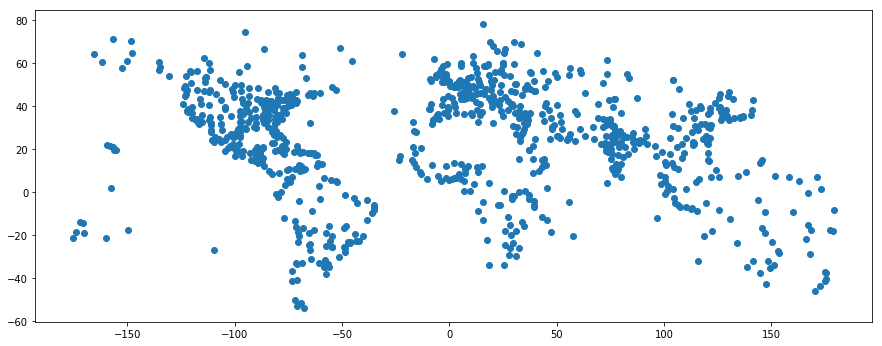

In [4]:
##### Visualising the airports
airports_1.plot(figsize=(15,15))
plt.show()

In [4]:
airports_1.shape

(891, 36)

In [5]:
airports_1.head()

,scalerank,featurecla,type,name,abbrev,location,gps_code,iata_code,wikipedia,natlscale,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
0,9,Airport,small,Sahnewal,LUH,terminal,VILD,LUH,http://en.wikipedia.org/wiki/Sahnewal_Airport,8.0,...,None,None,None,Ludhiana Airport,None,None,None,4,1159113785,POINT (75.95707224036518 30.85035985617018)
1,9,Airport,mid,Solapur,SSE,terminal,VASL,SSE,http://en.wikipedia.org/wiki/Solapur_Airport,8.0,...,None,None,None,None,None,None,None,4,1159113803,POINT (75.93305977107549 17.62541518363502)
2,9,Airport,mid,Birsa Munda,IXR,terminal,VERC,IXR,http://en.wikipedia.org/wiki/Birsa_Munda_Airport,8.0,...,Port lotniczy Ranchi,None,None,M. O. Ranchi,None,Sân bay Birsa Munda,蘭契,4,1159113831,POINT (85.32359703687671 23.31772459899619)
3,9,Airport,mid,Ahwaz,AWZ,terminal,OIAW,AWZ,http://en.wikipedia.org/wiki/Ahwaz_Airport,8.0,...,Port lotniczy Ahwaz,None,None,Ahwaz International Airport,Ahvaz Havalimanı,Sân bay Ahvaz,阿瓦士,4,1159113845,POINT (48.74710654359313 31.34315855607572)
4,9,Airport,mid and military,Gwalior,GWL,terminal,VIGR,GWL,http://en.wikipedia.org/wiki/Gwalior_Airport,8.0,...,Port lotniczy Gwalior,None,None,Gwalior Airport,None,Sân bay Gwalior,瓜廖爾,4,1159113863,POINT (78.21721865463483 26.28548769793701)


### Let's take a look at the second shapefile

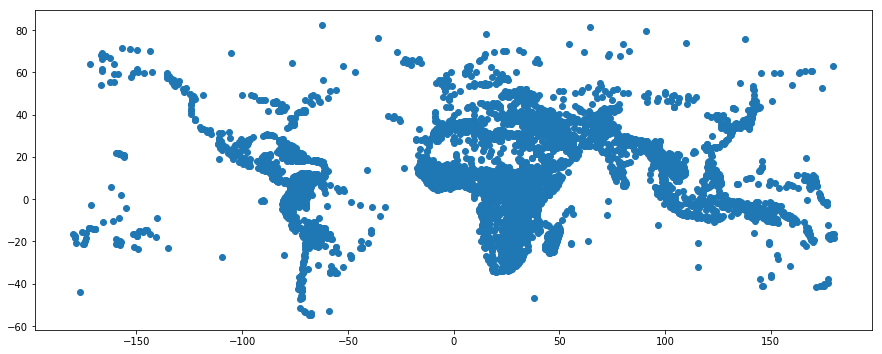

In [6]:
airports_2.plot(figsize = (15,15))
plt.show()

In [7]:
airports_2.columns

Index(['nameshort', 'namelong', 'namealt', 'city', 'icao', 'iata', 'apttype',
       'aptclass', 'authority', 'status', 'dmg', 'rwpaved', 'rwlengthm',
       'rwlengthf', 'elevm', 'elevf', 'humuse', 'humoperate', 'locprecisi',
       'latitude', 'longitude', 'iso3', 'iso3_op', 'country', 'lastcheckd',
       'remarks', 'url_lca', 'source', 'createdate', 'updatedate', 'geonameid',
       'gdb_geomat', 'rwwidthm', 'geometry'],
      dtype='object')

In [8]:
airports_2.head()

,nameshort,namelong,namealt,city,icao,iata,apttype,aptclass,authority,status,...,lastcheckd,remarks,url_lca,source,createdate,updatedate,geonameid,gdb_geomat,rwwidthm,geometry
0,La Javilla,La Javilla Airport,None,None,MLLJ,None,Airstrip,Unspecified,None,Open,...,2018-05-11,None,None,None,2018-05-11,2018-05-12,3623378.0,None,NaN,POINT (-85.29550170900001 9.811120033000009)
1,Murtala Muhammed,Murtala Muhammed,None,Lagos,DNMM,LOS,Airport,International,Civil/Military,Open,...,None,None,None,None,2013-05-14,2016-12-02,2332459.0,None,NaN,POINT (3.32213999999999 6.578530000000001)
2,Bida,Bida Airport,None,Bida,DNBI,None,Airstrip,Domestic,Civil,Open,...,None,None,None,None,2013-05-14,2016-12-02,2347209.0,None,NaN,POINT (6.015280000000018 9.103470000000016)
3,Kainji,Kainji,None,None,DNIX,None,Airfield,Domestic,Military,Unknown,...,None,None,None,None,2013-05-14,2016-12-02,NaN,None,NaN,POINT (4.485450000000014 9.89267000000001)
4,Katsina,Katsina,None,Katsina,None,None,Airfield,Domestic,Civil,Open,...,None,None,None,None,2013-05-14,2016-12-02,2334802.0,None,NaN,POINT (7.660000000000025 13.00799999999998)


In [9]:
# The number of airports
airports_2.shape

(6582, 34)

In [10]:
airports_2.authority.unique()

array([None, 'Civil/Military', 'Civil', 'Military', 'Private', 'Unknown',
       'Civil Public', 'International', 'Military/Civil', 'Domestic'],
      dtype=object)

In [13]:

{airportAuthority:sum([1 for obs in civilAirports.authority if obs == airportAuthority]) for airportAuthority in civilAirports.authority.unique()}#airports_2

{None: 131,
 'Civil/Military': 245,
 'Civil': 2462,
 'Private': 57,
 'Unknown': 1460,
 'Military': 292,
 'Civil Public': 5,
 'Military/Civil': 1,
 'Domestic': 1}

In [12]:
civilAirports = airports_2[airports_2.status == 'Open']

In [14]:
civilAirports.head()

,nameshort,namelong,namealt,city,icao,iata,apttype,aptclass,authority,status,...,lastcheckd,remarks,url_lca,source,createdate,updatedate,geonameid,gdb_geomat,rwwidthm,geometry
0,La Javilla,La Javilla Airport,None,None,MLLJ,None,Airstrip,Unspecified,None,Open,...,2018-05-11,None,None,None,2018-05-11,2018-05-12,3623378.0,None,NaN,POINT (-85.29550170900001 9.811120033000009)
1,Murtala Muhammed,Murtala Muhammed,None,Lagos,DNMM,LOS,Airport,International,Civil/Military,Open,...,None,None,None,None,2013-05-14,2016-12-02,2332459.0,None,NaN,POINT (3.32213999999999 6.578530000000001)
2,Bida,Bida Airport,None,Bida,DNBI,None,Airstrip,Domestic,Civil,Open,...,None,None,None,None,2013-05-14,2016-12-02,2347209.0,None,NaN,POINT (6.015280000000018 9.103470000000016)
4,Katsina,Katsina,None,Katsina,None,None,Airfield,Domestic,Civil,Open,...,None,None,None,None,2013-05-14,2016-12-02,2334802.0,None,NaN,POINT (7.660000000000025 13.00799999999998)
5,Escravos,Escravos,None,None,None,None,Airstrip,Domestic,Private,Open,...,None,None,None,None,2013-05-14,2016-12-02,NaN,None,NaN,POINT (5.18707999999998 5.61387000000002)


In [15]:
civilAirports.shape

(4654, 34)

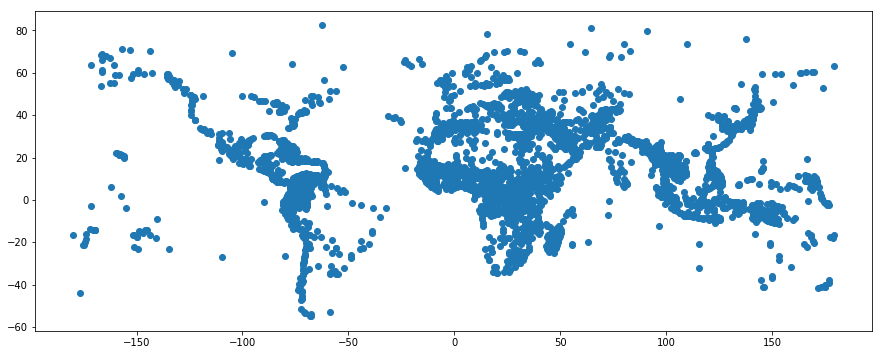

In [16]:
# Plotting the civil airports
civilAirports.plot(figsize = (15,15))
plt.show()

In [17]:
# There are different airport types as well, let's see the distribution of these as well.
{airportType:sum([1 for obs in civilAirports.apttype if obs == airportType]) for airportType in civilAirports.apttype}

{'Airstrip': 1846,
 'Airport': 1290,
 'Airfield': 927,
 'Helipad': 239,
 'Unknown': 349,
 None: 2,
 'Airstript': 1}

In [18]:
# Let's just keep all those thich are listed as airports.
civilActualAirports = civilAirports[civilAirports.apttype =='Airfield']
civilActualAirports = civilActualAirports.reset_index(drop=True)

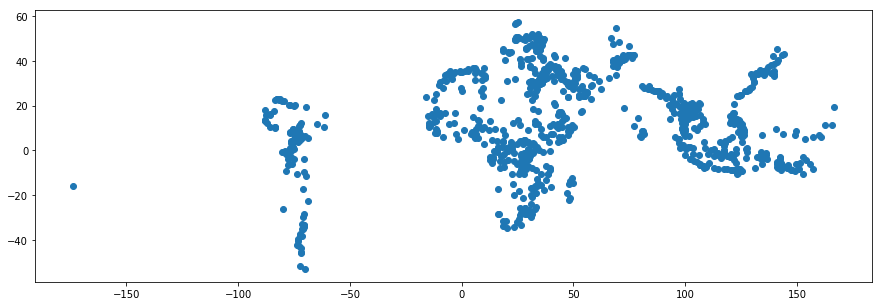

In [19]:
civilActualAirports.plot(figsize=(15,15))
plt.show()

Seems a bit weird that there are no airports in Europe all of sudden

In [20]:
civilAirports[civilAirports.city =='Copenhagen']

,nameshort,namelong,namealt,city,icao,iata,apttype,aptclass,authority,status,...,lastcheckd,remarks,url_lca,source,createdate,updatedate,geonameid,gdb_geomat,rwwidthm,geometry


In [21]:
airports_1[airports_1.abbrev=='CPH']

,scalerank,featurecla,type,name,abbrev,location,gps_code,iata_code,wikipedia,natlscale,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
804,3,Airport,major,Copenhagen,CPH,terminal,EKCH,CPH,http://en.wikipedia.org/wiki/Copenhagen_Airport,75.0,...,Port lotniczy Kopenhaga-Kastrup,Aeroporto de Copenhaga,Каструп,Köpenhamns flygplats,Kopenhag Havalimanı,Sân bay Copenhagen,哥本哈根凯斯楚普机场,4,1159126853,POINT (12.64935086845077 55.62850172215278)


In [22]:
# Airports have different status, let check the distribution to see if we can reduce the number of observations even more.
{status:sum([1 for obs in civilAirports.status if obs == status]) for status in civilAirports.status}

{'Open': 4654}

In [23]:
openCivilAirports = civilAirports[civilAirports.status=='Open']
openCivilAirports = openCivilAirports.reset_index(drop=True)

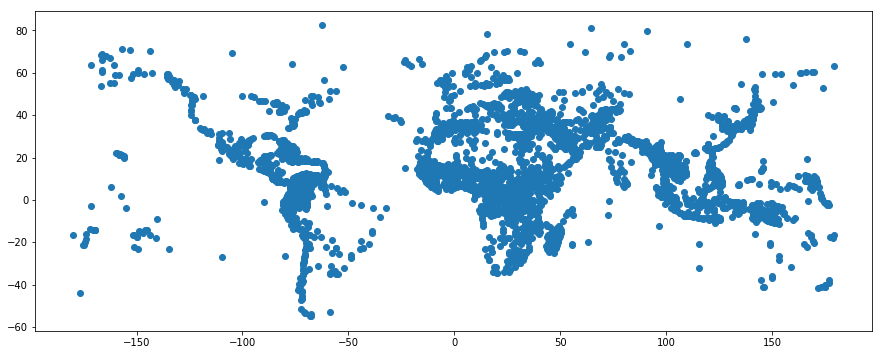

In [24]:
# Let's please the open ones.
openCivilAirports.plot(figsize=(15,15))
plt.show()

In [25]:
openCivilAirports.head()

,nameshort,namelong,namealt,city,icao,iata,apttype,aptclass,authority,status,...,lastcheckd,remarks,url_lca,source,createdate,updatedate,geonameid,gdb_geomat,rwwidthm,geometry
0,La Javilla,La Javilla Airport,None,None,MLLJ,None,Airstrip,Unspecified,None,Open,...,2018-05-11,None,None,None,2018-05-11,2018-05-12,3623378.0,None,NaN,POINT (-85.29550170900001 9.811120033000009)
1,Murtala Muhammed,Murtala Muhammed,None,Lagos,DNMM,LOS,Airport,International,Civil/Military,Open,...,None,None,None,None,2013-05-14,2016-12-02,2332459.0,None,NaN,POINT (3.32213999999999 6.578530000000001)
2,Bida,Bida Airport,None,Bida,DNBI,None,Airstrip,Domestic,Civil,Open,...,None,None,None,None,2013-05-14,2016-12-02,2347209.0,None,NaN,POINT (6.015280000000018 9.103470000000016)
3,Katsina,Katsina,None,Katsina,None,None,Airfield,Domestic,Civil,Open,...,None,None,None,None,2013-05-14,2016-12-02,2334802.0,None,NaN,POINT (7.660000000000025 13.00799999999998)
4,Escravos,Escravos,None,None,None,None,Airstrip,Domestic,Private,Open,...,None,None,None,None,2013-05-14,2016-12-02,NaN,None,NaN,POINT (5.18707999999998 5.61387000000002)


In [26]:
pointCoordinates = np.array([list(openCivilAirports.geometry.loc[obs].coords)[0] for obs in openCivilAirports.index])

In [27]:
# Let's now store the point coordinates for the first airport-shapefile as well, and see if there are similarity between
# the observations in each file.
pointCoordinatesAirports_1 = np.array([list(airports_1.geometry.loc[obs].coords)[0] for obs in airports_1.index])

In [28]:
print('The number of similar observations are: ', sum([True if point in pointCoordinates else False for point in pointCoordinatesAirports_1]))

The number of similar observations are:  0


### Let's see the ports.

#### First shapefile (WPI)

In [29]:
ports_1 = gpd.read_file('Data Sources/Global Ports Shapefile (1)/WPI.shp')

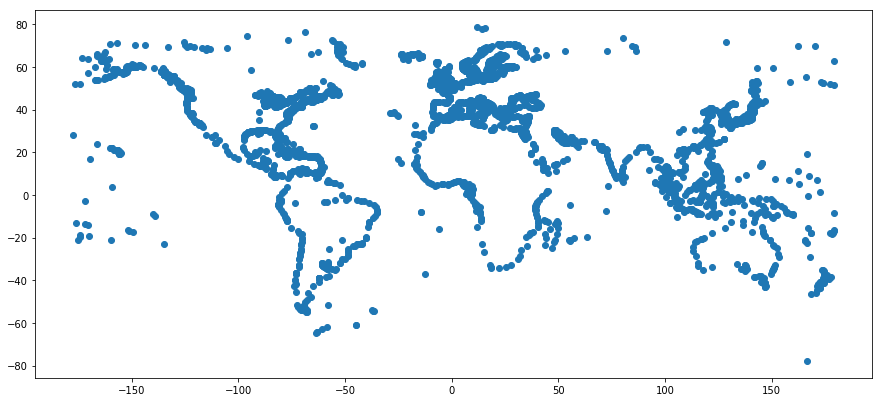

In [30]:
# Let's visualise the ports
ports_1.plot(figsize=(15,15))
plt.show()

In [31]:
ports_1.columns

Index(['INDEX_NO', 'REGION_NO', 'PORT_NAME', 'COUNTRY', 'LATITUDE',
       'LONGITUDE', 'LAT_DEG', 'LAT_MIN', 'LAT_HEMI', 'LONG_DEG', 'LONG_MIN',
       'LONG_HEMI', 'PUB', 'CHART', 'HARBORSIZE', 'HARBORTYPE', 'SHELTER',
       'ENTRY_TIDE', 'ENTRYSWELL', 'ENTRY_ICE', 'ENTRYOTHER', 'OVERHD_LIM',
       'CHAN_DEPTH', 'ANCH_DEPTH', 'CARGODEPTH', 'OIL_DEPTH', 'TIDE_RANGE',
       'MAX_VESSEL', 'HOLDGROUND', 'TURN_BASIN', 'PORTOFENTR', 'US_REP',
       'ETAMESSAGE', 'PILOT_REQD', 'PILOTAVAIL', 'LOC_ASSIST', 'PILOTADVSD',
       'TUGSALVAGE', 'TUG_ASSIST', 'PRATIQUE', 'SSCC_CERT', 'QUAR_OTHER',
       'COMM_PHONE', 'COMM_FAX', 'COMM_RADIO', 'COMM_VHF', 'COMM_AIR',
       'COMM_RAIL', 'CARGOWHARF', 'CARGO_ANCH', 'CARGMDMOOR', 'CARBCHMOOR',
       'CARICEMOOR', 'MED_FACIL', 'GARBAGE', 'DEGAUSS', 'DRTYBALLST',
       'CRANEFIXED', 'CRANEMOBIL', 'CRANEFLOAT', 'LIFT_100_', 'LIFT50_100',
       'LIFT_25_49', 'LIFT_0_24', 'LONGSHORE', 'ELECTRICAL', 'SERV_STEAM',
       'NAV_EQUIP', 'ELECREPAIR', '

In [32]:
ports_1.head()

,INDEX_NO,REGION_NO,PORT_NAME,COUNTRY,LATITUDE,LONGITUDE,LAT_DEG,LAT_MIN,LAT_HEMI,LONG_DEG,...,PROVISIONS,WATER,FUEL_OIL,DIESEL,DECKSUPPLY,ENG_SUPPLY,REPAIRCODE,DRYDOCK,RAILWAY,geometry
0,61090.0,61070.0,SHAKOTAN,RU,43.866667,146.833333,43.0,52.0,N,146.0,...,None,None,None,None,None,None,None,None,None,POINT (146.8333333333333 43.86666666666667)
1,61110.0,61100.0,MOMBETSU KO,JP,44.350000,143.350000,44.0,21.0,N,143.0,...,None,Y,None,Y,None,None,C,None,None,POINT (143.35 44.35)
2,61120.0,61100.0,ABASHIRI KO,JP,44.016667,144.283333,44.0,1.0,N,144.0,...,None,Y,None,Y,None,None,C,None,None,POINT (144.2833333333333 44.01666666666667)
3,61130.0,61100.0,NEMURO KO,JP,43.333333,145.583333,43.0,20.0,N,145.0,...,Y,Y,Y,None,None,None,None,None,None,POINT (145.5833333333333 43.33333333333334)
4,61140.0,61100.0,HANASAKI KO,JP,43.283333,145.583333,43.0,17.0,N,145.0,...,None,Y,Y,None,None,None,None,None,None,POINT (145.5833333333333 43.28333333333333)


In [33]:
ports_1.shape

(3669, 79)

In [34]:
ports_1.HARBORSIZE.unique()

array(['V', 'S', 'M', 'L', None], dtype=object)

In [35]:
{size:sum([True if obs == size else False for obs in ports_1.HARBORSIZE]) for size in ports_1.HARBORSIZE.unique()}

{'V': 2153, 'S': 990, 'M': 361, 'L': 160, None: 5}

In [36]:
sizeVPorts = ports_1[ports_1.HARBORSIZE == 'V']
sizeVPorts = sizeVPorts.reset_index(drop=True)

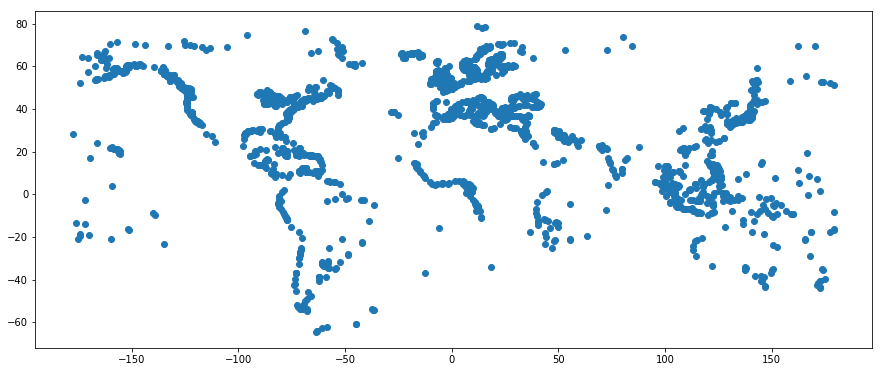

In [37]:
# Plot the V sized ports
sizeVPorts.plot(figsize=(15,15))
plt.show()

In [38]:
sizeVPorts.head()

,INDEX_NO,REGION_NO,PORT_NAME,COUNTRY,LATITUDE,LONGITUDE,LAT_DEG,LAT_MIN,LAT_HEMI,LONG_DEG,...,PROVISIONS,WATER,FUEL_OIL,DIESEL,DECKSUPPLY,ENG_SUPPLY,REPAIRCODE,DRYDOCK,RAILWAY,geometry
0,61090.0,61070.0,SHAKOTAN,RU,43.866667,146.833333,43.0,52.0,N,146.0,...,None,None,None,None,None,None,None,None,None,POINT (146.8333333333333 43.86666666666667)
1,61110.0,61100.0,MOMBETSU KO,JP,44.350000,143.350000,44.0,21.0,N,143.0,...,None,Y,None,Y,None,None,C,None,None,POINT (143.35 44.35)
2,61140.0,61100.0,HANASAKI KO,JP,43.283333,145.583333,43.0,17.0,N,145.0,...,None,Y,Y,None,None,None,None,None,None,POINT (145.5833333333333 43.28333333333333)
3,61180.0,61100.0,MORI,JP,42.116667,140.583333,42.0,7.0,N,140.0,...,None,None,None,None,None,None,None,None,None,POINT (140.5833333333333 42.11666666666667)
4,61205.0,61100.0,ESASI KO,JP,41.866667,140.116667,41.0,52.0,N,140.0,...,None,None,None,None,None,None,None,None,None,POINT (140.1166666666667 41.86666666666667)


#### Let's take a look at some cargo-related variables.

In [39]:
cargoColumns = [column for column in ports_1.columns if 'cargo' in column.lower()]

In [40]:
cargoColumns

['CARGODEPTH', 'CARGOWHARF', 'CARGO_ANCH']

In [41]:
for column in cargoColumns:
    print('%s\n' % column)
    print({uniVal:sum([True if obs == uniVal else False for obs in ports_1[column]]) for uniVal in ports_1[column].unique()},'\n')

CARGODEPTH

{'O': 339, 'J': 325, None: 453, 'K': 392, 'G': 121, 'F': 49, 'P': 268, 'H': 154, 'L': 457, 'M': 450, 'D': 12, 'E': 38, 'B': 15, 'N': 533, 'A': 25, 'Q': 29, 'C': 9} 

CARGOWHARF

{None: 875, 'Y': 2787, 'N': 7} 

CARGO_ANCH

{'Y': 1547, None: 2083, 'N': 39} 



### Let's take a look at the other shapefile

In [42]:
ports_2 = gpd.read_file('Data Sources/Global Ports Shapefile 2 (1)/ne_50m_ports.shp')

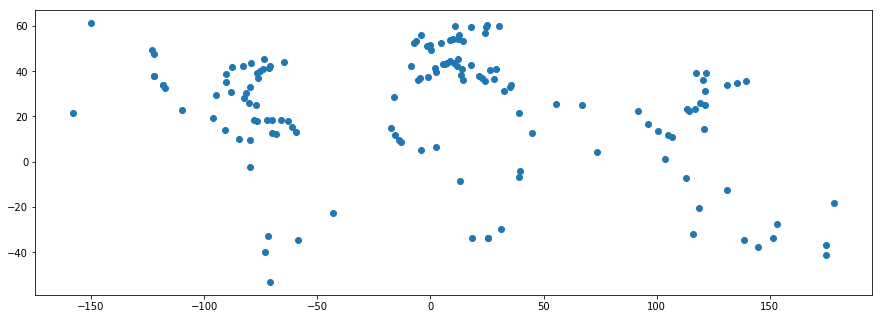

In [43]:
# Let's visualise it
ports_2.plot(figsize=(15,15))
plt.show()

In [44]:
ports_2.columns

Index(['scalerank', 'featurecla', 'name', 'website', 'natlscale', 'geometry'], dtype='object')

In [45]:
ports_2.shape

(143, 6)

In [46]:
ports_2.head()

,scalerank,featurecla,name,website,natlscale,geometry
0,3,Port,Oranjestad,www.arubaports.com,75.0,POINT (-70.03881036999999 12.52)
1,3,Port,Dubai,www.dpa.ae,75.0,POINT (55.26931684 25.26722222)
2,3,Port,Buenos Aires,www.puertobuenosaires.gov.ar,75.0,POINT (-58.3696702 -34.59916667)
3,3,Port,Darwin,www.darwinport.nt.gov.au,75.0,POINT (130.854947 -12.47027778)
4,3,Port,Melbourne,www.portofmelbourne.com,75.0,POINT (144.9171967 -37.83277778)


### Let's now